In [34]:
#STEP 1
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv(r'C:\Users\joshi\Downloads\Apps_data+(1).csv')

In [36]:
#Step 2
df.shape


(10841, 13)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [38]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [39]:
#step3
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [40]:
#Rating Type ,Content, Rating, Price, Category, Reviews

In [41]:
#Step 4
df = df.drop_duplicates()


In [42]:
#Step 5
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [43]:
df = df[df['Category'] != '1.9']


In [44]:
#step 6
df['Rating'].isnull().sum()


1465

In [45]:
def Rating_category(num):
    if num < 3.5:
        return 'Low'
    elif num >= 3.5:
        return 'High'

In [46]:
df['Rating_category'] = df['Rating'].map(Rating_category)

In [47]:
df[['Rating_category']].head(4)

,Rating_category
0,High
1,High
2,High
3,High


In [48]:
#Step 7
df['Rating_category'].value_counts()

Rating_category
High    8169
Low      723
Name: count, dtype: int64

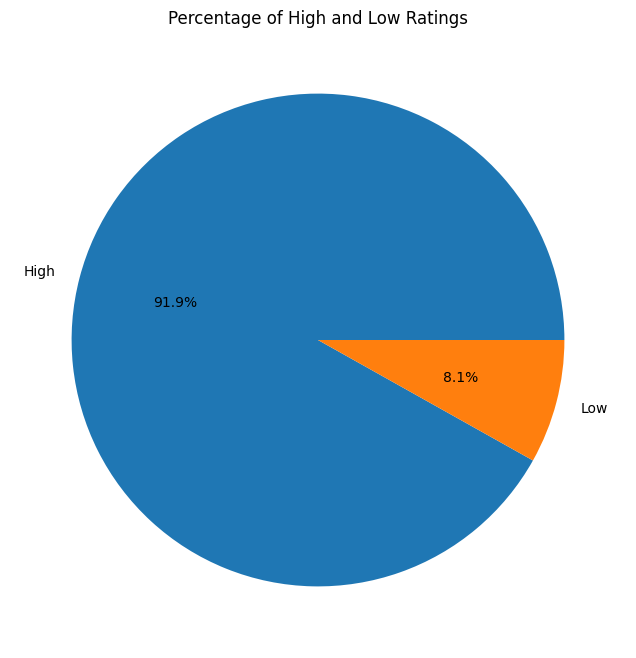

In [49]:
plt.figure(figsize=(8, 8))
rating_counts = df['Rating_category'].value_counts()
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
plt.title("Percentage of High and Low Ratings")
plt.show()

In [50]:
#Blue - High rated
#Orange - Low rated

In [51]:
#Srep 8
df['Reviews'] = df['Reviews'].astype(int)

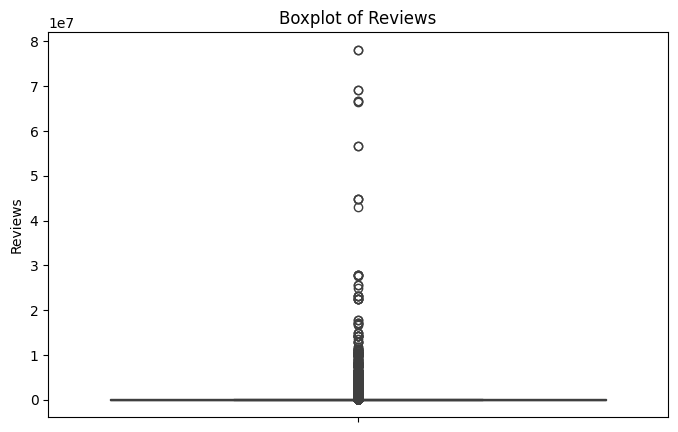

In [52]:
plt.figure(figsize=(8,5))
sns.boxplot(df['Reviews'])
plt.title("Boxplot of Reviews")
plt.show()

In [53]:
df['Reviews'] = np.log10(df['Reviews'] + 1)


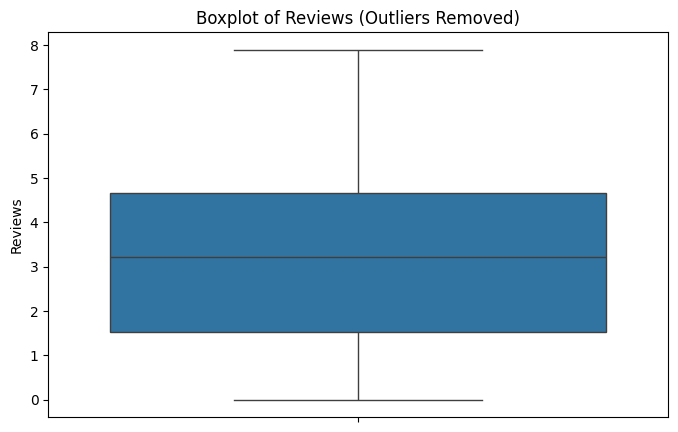

In [54]:
df_cleaned_reviews = df.dropna(subset=['Reviews'])
plt.figure(figsize=(8, 5))
sns.boxplot(df_cleaned_reviews['Reviews'])
plt.title("Boxplot of Reviews (Outliers Removed)")
plt.show()

In [55]:
#Step 9
df.drop(df[df['Size']=='Varies with device'].index,axis=0,inplace=True)

In [56]:
df.loc[:, 'Size'] = df['Size'].replace({'M': 'e6', 'K': 'e3'}, regex=True)
df.loc[:, 'Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [57]:
df[['Size']].head(3)

,Size
0,19000000.0
1,14000000.0
2,8700000.0


In [58]:
#Step 10
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '1,000,000,000+', '0+'], dtype=object)

In [59]:
df['Installs'] = df['Installs'].astype(str)
df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = df['Installs'].str.replace(',', '')

In [60]:
df['Installs'] = df['Installs'].astype(float)

In [61]:
#Step 11
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$1.49', '$2.99', '$3.99', '$7.99', '$5.99',
       '$1.99', '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99',
       '$11.99', '$79.99', '$16.99', '$14.99', '$1.00', '$29.99',
       '$12.99', '$3.49', '$10.99', '$7.49', '$1.50', '$19.99', '$15.99',
       '$33.99', '$74.99', '$39.99', '$2.49', '$4.49', '$1.70', '$2.00',
       '$3.88', '$25.99', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$1.59', '$6.49', '$1.29',
       '$5.00', '$13.99', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$19.90', '$8.49', '$1.75', '$14.00', '$4.85', '$46.99',
       '$109.99', '$154.99', '$3.08', '$2.59', '$4.80', '$8.99', '$1.96',
       '$19.40', '$15.46', '$3.04', '$4.29', '$2.60', '$3.28', '$4.60',
       '$28.99', '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99',
       '$3.61', '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [62]:
df['Price'] = df['Price'].str.replace('$','')
df['Price'] = df['Price'].astype(float)

In [63]:
#Step 12
df.drop(['Rating','App','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [64]:
df.head(4)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,2.204120,19000000.0,10000.0,Free,0.0,Everyone,High
1,ART_AND_DESIGN,2.985875,14000000.0,500000.0,Free,0.0,Everyone,High
2,ART_AND_DESIGN,4.942063,8700000.0,5000000.0,Free,0.0,Everyone,High
3,ART_AND_DESIGN,5.333739,25000000.0,50000000.0,Free,0.0,Teen,High


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8831 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         8831 non-null   object 
 1   Reviews          8831 non-null   float64
 2   Size             8516 non-null   object 
 3   Installs         8831 non-null   float64
 4   Type             8831 non-null   object 
 5   Price            8831 non-null   float64
 6   Content Rating   8831 non-null   object 
 7   Rating_category  7424 non-null   object 
dtypes: float64(3), object(5)
memory usage: 620.9+ KB


In [66]:
#Step 13
df.head(3)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,2.204120,19000000.0,10000.0,Free,0.0,Everyone,High
1,ART_AND_DESIGN,2.985875,14000000.0,500000.0,Free,0.0,Everyone,High
2,ART_AND_DESIGN,4.942063,8700000.0,5000000.0,Free,0.0,Everyone,High


In [67]:
for val in df.columns:
    print(val,":",len(df[val].unique()))

Category : 33
Reviews : 4680
Size : 182
Installs : 20
Type : 2
Price : 87
Content Rating : 6
Rating_category : 3


In [68]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

In [69]:
cat_onehot = onehot.fit_transform(df[['Category']])

In [70]:
cat_onehot

,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
contrat_onehot = onehot.fit_transform(df[['Content Rating']])

In [72]:
contrat_onehot

,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
10835,0.0,1.0,0.0,0.0,0.0,0.0
10836,0.0,1.0,0.0,0.0,0.0,0.0
10837,0.0,1.0,0.0,0.0,0.0,0.0
10838,0.0,1.0,0.0,0.0,0.0,0.0


In [73]:
df = pd.concat([df,cat_onehot,contrat_onehot],axis=1)

In [74]:
df.drop(columns=['Category','Content Rating'],inplace=True)

In [75]:
df.head(3)

,Reviews,Size,Installs,Type,Price,Rating_category,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,2.204120,19000000.0,10000.0,Free,0.0,High,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.985875,14000000.0,500000.0,Free,0.0,High,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4.942063,8700000.0,5000000.0,Free,0.0,High,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [76]:
df['Rating_category'] = df['Rating_category'].replace({'High':1,'Low':0})

In [77]:
df['Type'] = df['Type'].replace({'Free':0,'Paid':1})

In [78]:
df.head(3)

,Reviews,Size,Installs,Type,Price,Rating_category,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,2.204120,19000000.0,10000.0,0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.985875,14000000.0,500000.0,0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4.942063,8700000.0,5000000.0,0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [79]:
#Step 14
X = df.drop('Rating_category',axis=1)

In [80]:
y = df[['Rating_category']]

In [81]:
y

,Rating_category
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
10835,NaN
10836,1.0
10837,1.0
10838,NaN


In [82]:
#Step 15
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529)

In [84]:
#Step 16
from sklearn.preprocessing import StandardScaler
stdscale = StandardScaler()

In [85]:
df = stdscale.fit_transform(df)

In [86]:
df = pd.DataFrame(df)

In [87]:
df

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-0.366531,-0.135419,-0.154361,-0.291358,-0.066713,0.316766,11.892665,-0.09255,-0.073148,-0.15066,...,-0.3022,-0.143836,-0.122709,-0.080601,-0.015051,0.476844,-0.191692,-0.208527,-0.347398,-0.015051
1,0.065387,-0.356794,-0.142844,-0.291358,-0.066713,0.316766,11.892665,-0.09255,-0.073148,-0.15066,...,-0.3022,-0.143836,-0.122709,-0.080601,-0.015051,0.476844,-0.191692,-0.208527,-0.347398,-0.015051
2,1.146176,-0.591451,-0.037084,-0.291358,-0.066713,0.316766,11.892665,-0.09255,-0.073148,-0.15066,...,-0.3022,-0.143836,-0.122709,-0.080601,-0.015051,0.476844,-0.191692,-0.208527,-0.347398,-0.015051
3,1.362576,0.130230,1.020521,-0.291358,-0.066713,0.316766,11.892665,-0.09255,-0.073148,-0.15066,...,-0.3022,-0.143836,-0.122709,-0.080601,-0.015051,-2.097122,-0.191692,-0.208527,2.878544,-0.015051
4,0.065387,-0.852672,-0.152245,-0.291358,-0.066713,0.316766,11.892665,-0.09255,-0.073148,-0.15066,...,-0.3022,-0.143836,-0.122709,-0.080601,-0.015051,0.476844,-0.191692,-0.208527,-0.347398,-0.015051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,-1.584302,-0.551603,-0.154595,-0.291358,-0.066713,NaN,-0.084085,-0.09255,-0.073148,-0.15066,...,-0.3022,-0.143836,-0.122709,-0.080601,-0.015051,0.476844,-0.191692,-0.208527,-0.347398,-0.015051
8827,-0.705243,1.369926,-0.154478,-0.291358,-0.066713,0.316766,-0.084085,-0.09255,-0.073148,-0.15066,...,-0.3022,-0.143836,-0.122709,-0.080601,-0.015051,0.476844,-0.191692,-0.208527,-0.347398,-0.015051
8828,-1.198123,-0.817253,-0.154593,-0.291358,-0.066713,0.316766,-0.084085,-0.09255,-0.073148,-0.15066,...,-0.3022,-0.143836,-0.122709,-0.080601,-0.015051,0.476844,-0.191692,-0.208527,-0.347398,-0.015051
8829,-1.251665,-0.556031,-0.154572,-0.291358,-0.066713,NaN,-0.084085,-0.09255,-0.073148,-0.15066,...,-0.3022,-0.143836,-0.122709,-0.080601,-0.015051,0.476844,-0.191692,-0.208527,-0.347398,-0.015051


In [ ]:
#Part 1 Completed